In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
bikeshare_q1 = pd.read_csv('bikeshare_q1.csv', 
                           parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
bikeshare_q2 = pd.read_csv('bikeshare_q2.csv', 
                           parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
bikeshare_q3 = pd.read_csv('bikeshare_q3.csv', 
                           parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
bikeshare_q4 = pd.read_csv('bikeshare_q4.csv', 
                           parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])
bikeshare_q1_2012 = pd.read_csv('bikeshare_2012_q1.csv', 
                           parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'])

In [3]:
bikeshare_q2.columns

Index(['Unnamed: 0', 'Duration', 'Start date', 'End date', 'Start station',
       'End station', 'Member Type', 'start_date_short', 'end_date_short',
       'time_diff', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [4]:
bikeshare_q3.columns

Index(['Unnamed: 0', 'Duration', 'Start date', 'End date', 'Start station',
       'End station', 'Member Type', 'start_date_short', 'end_date_short',
       'time_diff', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [5]:
bikeshare_q4.columns

Index(['Unnamed: 0', 'Duration', 'Start date', 'End date', 'Start station',
       'End station', 'Member Type', 'start_date_short', 'end_date_short',
       'time_diff', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [6]:
bikeshare_q1_2012.columns

Index(['Unnamed: 0', 'Duration', 'Start date', 'End date', 'Start station',
       'End station', 'Member Type', 'start_date_short', 'end_date_short',
       'time_diff', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [7]:
bikeshare_full = pd.concat([bikeshare_q1, bikeshare_q2, bikeshare_q3, bikeshare_q4, bikeshare_q1_2012], axis=0)

In [8]:
bikeshare_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604706 entries, 0 to 364209
Data columns (total 20 columns):
Unnamed: 0          1604706 non-null int64
Duration            1604706 non-null object
Start date          1604706 non-null datetime64[ns]
End date            1604706 non-null datetime64[ns]
Start station       1604706 non-null object
End station         1604706 non-null object
Member Type         1604706 non-null object
start_date_short    1604706 non-null datetime64[ns]
end_date_short      1604706 non-null datetime64[ns]
time_diff           1604706 non-null float64
season              1604706 non-null int64
mnth                1604706 non-null int64
holiday             1604706 non-null int64
weekday             1604706 non-null int64
workingday          1604706 non-null int64
weathersit          1604706 non-null int64
temp                1604706 non-null float64
atemp               1604706 non-null float64
hum                 1604706 non-null float64
windspeed           160

In [9]:
bikeshare_full.drop('Unnamed: 0', 1, inplace=True)

In [10]:
bikeshare_full.to_csv('bikeshare_full.csv')

In [11]:
print(len(bikeshare_full[bikeshare_full['time_diff'] < 0]))
bikeshare_full[bikeshare_full['time_diff'] < 0]

0


,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [12]:
bikeshare_full.loc[bikeshare_full.time_diff < 0, 'time_diff'] = bikeshare_full.loc[bikeshare_full.time_diff < 0, 'time_diff'] + 60

In [13]:
bikeshare_full.loc[bikeshare_full.time_diff < 0]

,Duration,Start date,End date,Start station,End station,Member Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [14]:
bikeshare_full = bikeshare_full[bikeshare_full['time_diff'] != 0]

In [15]:
bikeshare_full.shape

(1604706, 19)

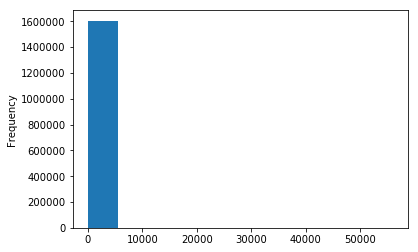

In [16]:
bikeshare_full['time_diff'].plot.hist()
plt.show()

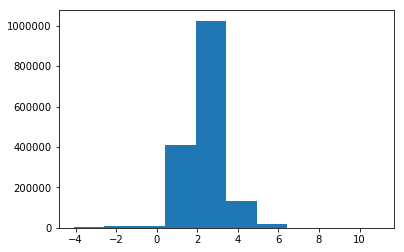

In [17]:
plt.hist(np.log(bikeshare_full['time_diff']))
plt.show()

In [18]:
bikeshare_smaller = bikeshare_full.copy()
bikeshare_smaller = bikeshare_smaller[bikeshare_smaller['time_diff'] < 80]
bikeshare_smaller = bikeshare_smaller[bikeshare_smaller['time_diff'] >= 0.5]
bikeshare_smaller.shape

(1538148, 19)

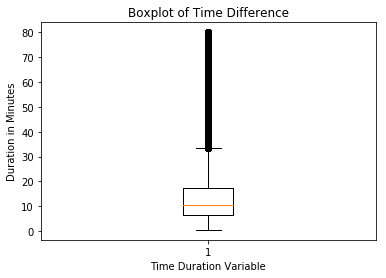

In [19]:
fig, ax = plt.subplots()
ax.boxplot(bikeshare_smaller['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

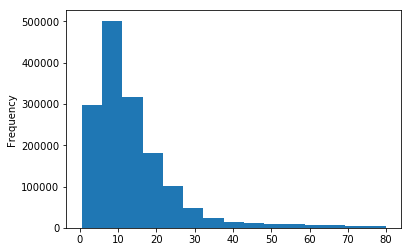

In [20]:
bikeshare_smaller['time_diff'].plot.hist(bins=15)
plt.show()

In [21]:
bikeshare_smaller['time_diff'].describe()

count    1.538148e+06
mean     1.390583e+01
std      1.151215e+01
min      5.000000e-01
25%      6.600000e+00
50%      1.070000e+01
75%      1.726700e+01
max      7.998300e+01
Name: time_diff, dtype: float64

In [22]:
bikeshare_smaller.to_csv('bikeshare_reduced.csv')

In [23]:
len(bikeshare_full[bikeshare_full['Start station'] == bikeshare_full['End station']])

82616

In [24]:
time_diff_same = bikeshare_full[bikeshare_full['Start station'] == bikeshare_full['End station']]['time_diff']

In [25]:
time_diff_same.describe()

count    82616.000000
mean        55.842519
std        123.950605
min          0.017000
25%          2.483000
50%         25.417000
75%         77.421000
max       8178.450000
Name: time_diff, dtype: float64

In [26]:
sum(time_diff_same <= .5)

13857

In [27]:
len(bikeshare_full[bikeshare_full['time_diff'] <= .5])

13858

In [29]:
bikeshare_large = bikeshare_full[bikeshare_full['time_diff'] > 80]
bikeshare_large['Member Type'].value_counts()

Casual        47757
Registered     5083
Name: Member Type, dtype: int64

In [30]:
len(bikeshare_large)

52840

In [33]:
np.log(13)

2.5649493574615367

In [34]:
len(bikeshare_smaller)

1538148